# Telecom Logistic Regression Analysis

Github Link: https://github.com/TrangNguyen95/TeleLogisticRegression

Data: WA_Fn-UseC_-Telco-Customer-Churn.csv


In [1]:
import os
os.getcwd()

'C:\\Users\\Trang\\Anaconda3\\BUAN6340\\Midterm'

## Import Packages

In [2]:
import numpy as np
import pandas as pd


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__)

2.2.3


In [5]:
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


## Exploratory Data Analysis

In [6]:
Tele=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [7]:
Tele.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
Tele.SeniorCitizen.sum()

1142

In [9]:
Tele.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

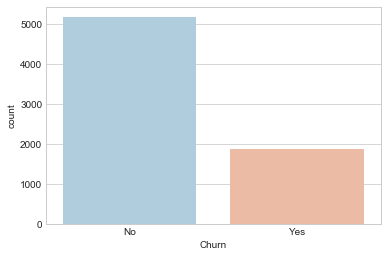

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',data=Tele,palette='RdBu_r')

Text(0,0.5,'Frequency of Churn')

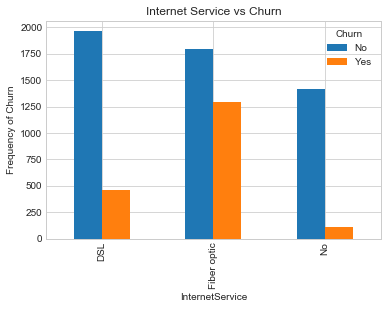

In [11]:
pd.crosstab(Tele.InternetService,Tele.Churn).plot(kind='bar')
plt.title('Internet Service vs Churn')
plt.xlabel('InternetService')
plt.ylabel('Frequency of Churn')

## Converting Categorical Features 


In [12]:
Gen_dum=pd.get_dummies(Tele['gender'],drop_first=True)


In [13]:
Part_dum=pd.get_dummies(Tele['Partner'],drop_first=True)
Part_dum.columns=['Partner']

In [14]:
Dep_dum=pd.get_dummies(Tele['Dependents'],drop_first=True)
Dep_dum.columns=['Dependent']

In [15]:
Phone_dum=pd.get_dummies(Tele['PhoneService'],drop_first=True)
Phone_dum.columns=['PhoneService']

In [16]:
MPhone_dum=pd.get_dummies(Tele['MultipleLines'])
MPhone_dum1=MPhone_dum.drop(['No','No phone service'],axis=1)
MPhone_dum1.columns=['Multiple Phone Lines']

In [17]:
Int_dum=pd.get_dummies(Tele['InternetService'])
Int_dum1=Int_dum.drop(['No'],axis=1)


In [18]:
OnSec_dum=pd.get_dummies(Tele['OnlineSecurity'])
OnSec_dum1=MPhone_dum.drop(['No','No phone service'],axis=1)
OnSec_dum1.columns=['Online Security']

In [19]:
OnBac_dum=pd.get_dummies(Tele['OnlineBackup'])
OnBac_dum1=MPhone_dum.drop(['No','No phone service'],axis=1)
OnBac_dum1.columns=['Online Backup']

In [20]:
DevProt_dum=pd.get_dummies(Tele['DeviceProtection'])
DevProt_dum1=MPhone_dum.drop(['No','No phone service'],axis=1)
DevProt_dum1.columns=['Device Protection']

In [21]:
TecSup_dum=pd.get_dummies(Tele['TechSupport'])
TecSup_dum1=MPhone_dum.drop(['No','No phone service'],axis=1)
TecSup_dum1.columns=['Tech Support']

In [22]:
TVStrm_dum=pd.get_dummies(Tele['StreamingTV'])
TVStrm_dum1=MPhone_dum.drop(['No','No phone service'],axis=1)
TVStrm_dum1.columns=['Streaming TV']

In [23]:
MVStrm_dum=pd.get_dummies(Tele['StreamingMovies'])
MVStrm_dum1=MPhone_dum.drop(['No','No phone service'],axis=1)
MVStrm_dum1.columns=['Streaming Movies']


In [24]:
Contract_dum=pd.get_dummies(Tele['Contract'])
Contract_dum.columns=['Month-to-month Contract','One Year Contract','Two Year Contract']


In [25]:
EBill_dum=pd.get_dummies(Tele['PaperlessBilling'],drop_first=True)
EBill_dum.columns=['Paperless Billing']

In [26]:
Churn_dum=pd.get_dummies(Tele['Churn'],drop_first=True)
Churn_dum.columns=['Churn']

In [27]:
Charges=pd.DataFrame({'Tenure':Tele['tenure'],'SeniorCitizen':Tele['SeniorCitizen'],'Monthly Charges':Tele['MonthlyCharges'],'Total Charges':Tele['TotalCharges']})

Converting object variables to integer.

In [28]:
from sklearn import preprocessing
for column in Charges.columns:
    if Charges[column].dtype == type(object):
        le = preprocessing.LabelEncoder()
        Charges[column] = le.fit_transform(Charges[column])

In [29]:
Charges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
Monthly Charges    7043 non-null float64
SeniorCitizen      7043 non-null int64
Tenure             7043 non-null int64
Total Charges      7043 non-null int64
dtypes: float64(1), int64(3)
memory usage: 220.2 KB


In [30]:
Tele_df1=pd.concat([Churn_dum,Charges,Gen_dum,Part_dum,Dep_dum,Phone_dum,MPhone_dum1,Int_dum1,OnSec_dum1,OnBac_dum1,DevProt_dum1,TecSup_dum1,TVStrm_dum1,MVStrm_dum1,Contract_dum,EBill_dum],axis=1)
Tele_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
Churn                      7043 non-null uint8
Monthly Charges            7043 non-null float64
SeniorCitizen              7043 non-null int64
Tenure                     7043 non-null int64
Total Charges              7043 non-null int64
Male                       7043 non-null uint8
Partner                    7043 non-null uint8
Dependent                  7043 non-null uint8
PhoneService               7043 non-null uint8
Multiple Phone Lines       7043 non-null uint8
DSL                        7043 non-null uint8
Fiber optic                7043 non-null uint8
Online Security            7043 non-null uint8
Online Backup              7043 non-null uint8
Device Protection          7043 non-null uint8
Tech Support               7043 non-null uint8
Streaming TV               7043 non-null uint8
Streaming Movies           7043 non-null uint8
Month-to-month Contract    7043 non-null uint

Let's see how the independent variable data run accross the two Churn classes. 

In [31]:
Tele_df1.groupby('Churn').mean()

,Monthly Charges,SeniorCitizen,Tenure,Total Charges,Male,Partner,Dependent,PhoneService,Multiple Phone Lines,DSL,...,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Month-to-month Contract,One Year Contract,Two Year Contract,Paperless Billing
Churn,,,,,,,,,,,,,,,,,,,,,
0,61.265124,0.128721,37.569965,3241.35949,0.507344,0.528218,0.344801,0.901044,0.409934,0.379204,...,0.409934,0.409934,0.409934,0.409934,0.409934,0.409934,0.429068,0.252609,0.318322,0.535562
1,74.441332,0.254682,17.979133,3303.29053,0.497592,0.357945,0.174425,0.909042,0.454789,0.245586,...,0.454789,0.454789,0.454789,0.454789,0.454789,0.454789,0.885500,0.088818,0.025682,0.749064


Based on the table above, in average, people who pay less, have high tenure, and have at least 1 year contract have lower churn rates.

Text(0.5,1,'Heatmap Shows Correlations among Attributes')

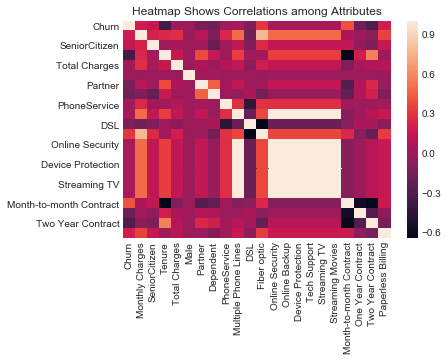

In [32]:
sns.heatmap(Tele_df1.corr())
plt.title('Heatmap Shows Correlations among Attributes')


As expected, most correlations between Churn and other variables are negative, which indicate that the more involved people are with the company, the less they are likely to leave. We will run logistic regression analysis to find out if this theory holds.  

## Logistic Regression Model

#### Train Test Split

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [35]:
from sklearn.metrics import classification_report

#### Building the Model

##### Model1

In [36]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(Tele_df1.drop('Churn',axis=1),Tele_df1['Churn'], test_size=0.30,random_state=101)

In [37]:
logmodel.fit(X_train1,y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train1,X_train1)
fitted1=logit_model.fit()
print(fitted1.summary())

Optimization terminated successfully.
         Current function value: inf
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                          Logit   Df Residuals:                     4915
Method:                           MLE   Df Model:                           14
Date:                Fri, 09 Mar 2018   Pseudo R-squ.:                    -inf
Time:                        23:01:00   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                   -9.4980e+05
                                        LLR p-value:                     1.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Monthly Charges             0.0124      0.004      2.829      0.005       0.004       0

C:\Users\Trang\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.

C:\Users\Trang\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1214: RuntimeWarning:

overflow encountered in exp

C:\Users\Trang\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1264: RuntimeWarning:

divide by zero encountered in log



In [39]:
logmodel.fit(X_test1,y_test1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
predictions1 = logmodel.predict(X_test1)

##### Model Evaluation

In [41]:
print(classification_report(y_test1,predictions1))

             precision    recall  f1-score   support

          0       0.84      0.90      0.87      1546
          1       0.67      0.52      0.58       567

avg / total       0.79      0.80      0.79      2113



In [42]:
from sklearn import metrics

In [43]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
y_pred_class1 = logmodel.predict(X_test1)
confusion1 = metrics.confusion_matrix(y_test1, y_pred_class1)
print(confusion1)

[[1397  149]
 [ 271  296]]


Intepreting the Evaluation:

**Precision**: When a we predict that a customer will churn, the prediction is correct about 79% of the time.

**Recall**: When a group of customer turn out to churn, we can predict 80% of that group.


**True Positives (TP):** We correctly predict that customer will churn: 296  

**True Negative (TN):** We correctly predict that customer won't churn: 1397

**False Positives (FP):** We falsely predict that customer will churn: 149  

**False Negative (FN):** We falsely predict that customer won't churn: 271


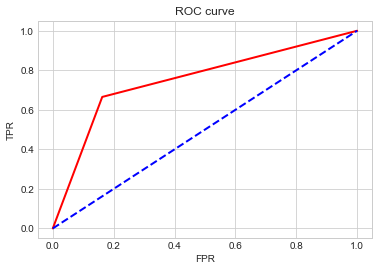

In [44]:
fpr, tpr,_=roc_curve(logmodel.predict(X_test1),y_test1,drop_intermediate=False)
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [45]:
roc_auc_score(logmodel.predict(X_test1),y_test1)

0.7513492576725137

We will adjust the independent variables to see if we can improve the model's scores.

##### Model2

Since not all independent variables are significant with alpha of 0.1, let's try removing these attributes and run the model again.

In [46]:
alpha = 0.1
X_stat2 = pd.DataFrame(data = [x for x in fitted1.summary().tables[1].data[1:] if float(x[4]) > alpha], columns = fitted1.summary().tables[1].data[0])

In [47]:
X_stat2.columns=['Variables','coef','std err','t','P>|t|','[0.025','0.975]']

In [48]:
X_stat2

,Variables,coef,std err,t,P>|t|,[0.025,0.975]
0,Male,0.0329,0.077,0.429,0.668,-0.118,0.183
1,Partner,-0.0029,0.092,-0.032,0.974,-0.183,0.177
2,Dependent,-0.1668,0.107,-1.566,0.117,-0.376,0.042
3,Multiple Phone Lines,0.0307,4.61e+06,6.66e-09,1.000,-9.03e+06,9.03e+06
4,DSL,0.2487,0.219,1.133,0.257,-0.181,0.679
5,Online Security,0.0307,4.61e+06,6.66e-09,1.000,-9.03e+06,9.03e+06
6,Online Backup,0.0307,4.61e+06,6.66e-09,1.000,-9.03e+06,9.03e+06
7,Device Protection,0.0307,4.61e+06,6.66e-09,1.000,-9.03e+06,9.03e+06
8,Tech Support,0.0307,4.61e+06,6.66e-09,1.000,-9.03e+06,9.03e+06
9,Streaming TV,0.0307,4.61e+06,6.66e-09,1.000,-9.03e+06,9.03e+06


In [49]:
Tele_df2=Tele_df1.drop(X_stat2['Variables'],axis=1)

In [50]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(Tele_df2.drop('Churn',axis=1), 
                                                    Tele_df2['Churn'], test_size=0.30, 
                                                    random_state=101)

In [51]:
logmodel.fit(X_train2,y_train2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
logit_model=sm.Logit(y_train2,X_train2)
fitted2=logit_model.fit()
print(fitted2.summary())

Optimization terminated successfully.
         Current function value: inf
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                          Logit   Df Residuals:                     4920
Method:                           MLE   Df Model:                            9
Date:                Fri, 09 Mar 2018   Pseudo R-squ.:                    -inf
Time:                        23:07:34   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                   -9.4980e+05
                                        LLR p-value:                     1.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Monthly Charges             0.0176      0.003      6.037      0.000       0.012       0

C:\Users\Trang\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1214: RuntimeWarning:

overflow encountered in exp

C:\Users\Trang\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1264: RuntimeWarning:

divide by zero encountered in log



Overall, Model 2 is a better fit since all variables have P-value less than alpha of 0.1. Besides, looking at the averages table, these dropped attributes means are not that much different when it come to Churn or no Churn.

In [53]:
logmodel.fit(X_test2,y_test2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [54]:
predictions2 = logmodel.predict(X_test2)

##### Model Evaluation

In [55]:
print(classification_report(y_test2,predictions2))

             precision    recall  f1-score   support

          0       0.84      0.90      0.87      1546
          1       0.66      0.53      0.59       567

avg / total       0.79      0.80      0.79      2113



In [56]:
y_pred_class2 = logmodel.predict(X_test2)
confusion2 = metrics.confusion_matrix(y_test2, y_pred_class2)
print(confusion2)

[[1390  156]
 [ 265  302]]


Intepreting the Evaluation:

**Precision**: When a we predict that a customer will churn, the prediction is correct about 79% of the time.

**Recall**: When a group of customer turn out to churn, we can predict 80% of that group.



**True Positives (TP):** We correctly predict that they will churn: 302  

**True Negative (TN):** We correctly predict that they won't churn: 1390

**False Positives (FP):** We falsely predict that they will churn: 156  

**False Negative (FN):** We falsely predict that they won't churn: 265


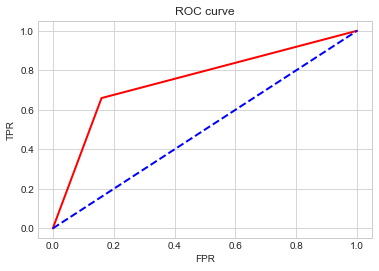

In [57]:
fpr, tpr,_=roc_curve(logmodel.predict(X_test2),y_test2,drop_intermediate=False)
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [58]:
roc_auc_score(logmodel.predict(X_test2),y_test2)

0.74963390018337972

For the Tele company, correctly predicting the churn variable will help the company allocate their customer services, customer incentives program, and advertisement resources better. For example, they will know who to target if they want to expand the market segment or to avoid churn. 